In [10]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras
import pandas as pd

In [2]:
train=pd.read_csv("./archive (2)/insat_3d_ds - Sheet.csv")
train

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


train = pd.read_csv("../input/insat3d-infrared-raw-cyclone-images-20132021/insat_3d_ds - Sheet.csv")
archive (2)\insat3d_raw_cyclone_ds\CYCLONE_DATASET_FINAL
archive (2)\insat3d_raw_cyclone_ds\CYCLONE_DATASET_FINAL\25.jpg


Number of images found: 136


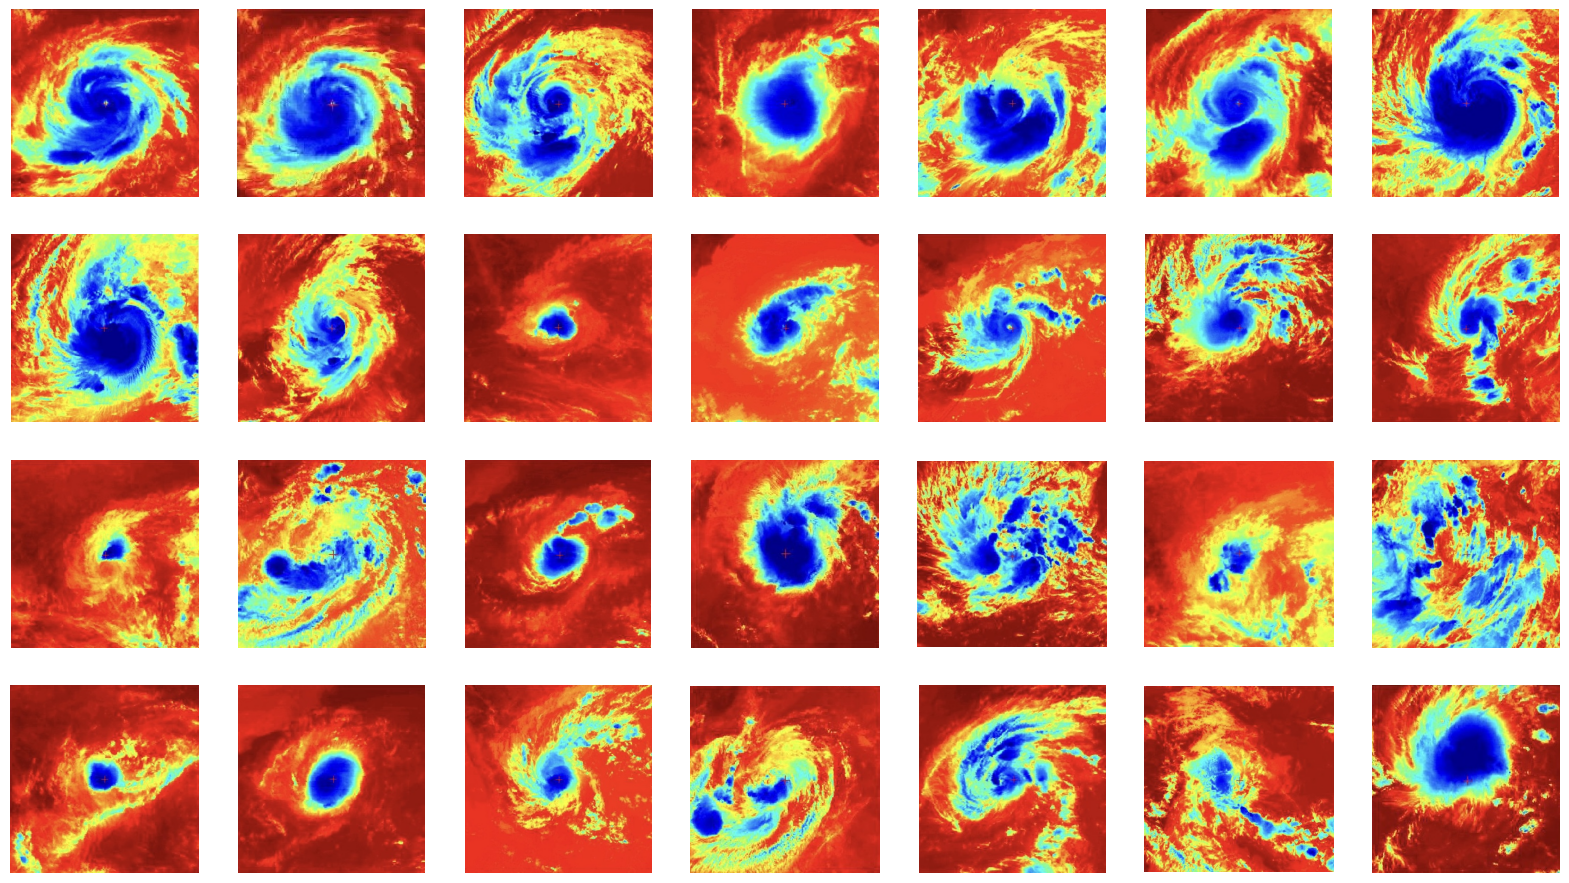

In [3]:

# Adjust the path to match your local system
paths = glob.glob(r"C:\Users\91812\Desktop\Projects\Reinf\Cyclone\archive (2)\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED\*.jpg")

# Check the number of images found
num_images = len(paths)
print(f"Number of images found: {num_images}")

# If no images are found, print an error message and exit
if num_images == 0:
    print("No images found. Please check the directory path and file extensions.")
else:
    # Set the number of images to display
    num_to_display = min(28, num_images)

    plt.figure(figsize=(20, 20))
    for i in range(num_to_display):
        cur_img = mpimg.imread(paths[i])
        ax = plt.subplot(7, 7, i + 1)
        plt.imshow(cur_img.astype("uint8"))
        plt.axis("off")

    plt.show()


In [4]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available.")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")


GPU is available.
GPU name: NVIDIA GeForce RTX 3060 Laptop GPU


c:\Users\91812\anaconda3\envs\pet\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\91812\anaconda3\envs\pet\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Train Loss: 0.5203, Val Loss: 48361.8477
Epoch 2/100, Train Loss: 105890.1094, Val Loss: 3011.6433
Epoch 3/100, Train Loss: 6553.7949, Val Loss: 8680.0303
Epoch 4/100, Train Loss: 19717.2598, Val Loss: 24280.0801
Epoch 5/100, Train Loss: 55218.2734, Val Loss: 20032.1797
Epoch 6/100, Train Loss: 45632.4688, Val Loss: 7864.7256
Epoch 7/100, Train Loss: 17714.9570, Val Loss: 567.3603
Epoch 8/100, Train Loss: 1102.8796, Val Loss: 1227.9730
Epoch 9/100, Train Loss: 3414.4187, Val Loss: 5684.1650
Epoch 10/100, Train Loss: 14922.7324, Val Loss: 8473.8662
Epoch 11/100, Train Loss: 22201.7461, Val Loss: 7556.4932
Epoch 12/100, Train Loss: 19966.1387, Val Loss: 4343.8730
Epoch 13/100, Train Loss: 11677.0117, Val Loss: 1283.7000
Epoch 14/100, Train Loss: 3613.1855, Val Loss: 8.8018
Epoch 15/100, Train Loss: 59.8078, Val Loss: 735.5723
Epoch 16/100, Train Loss: 1634.7832, Val Loss: 2329.5146
Epoch 17/100, Train Loss: 5585.4873, Val Loss: 3358.1770
Epoch 18/100, Train Loss: 8327.1113, 

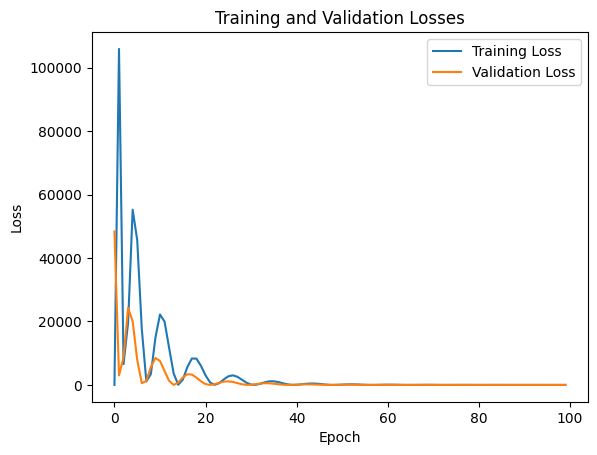

In [5]:


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(16 * 256 * 256, 1)  # Adjust based on input image size and network architecture

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 256 * 256)  # Adjust based on input image size and network architecture
        x = self.fc1(x)
        return x


# Define the dataset class
class CycloneDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.dataframe.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Example DataFrame setup
data = {
    "img_name": ["25.jpg", "28.jpg", "30.jpg"],  # Add your image filenames
    "label": [0, 1, 0]  # Add your corresponding labels
}
df = pd.DataFrame(data)

# Split the DataFrame into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Define the path to your local directory
local_directory = r"C:\Users\91812\Desktop\Projects\Reinf\Cyclone\archive (2)\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED"

# Create datasets and dataloaders
train_dataset = CycloneDataset(dataframe=train_df, root_dir=local_directory, transform=data_transforms['train'])
val_dataset = CycloneDataset(dataframe=val_df, root_dir=local_directory, transform=data_transforms['val'])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0)

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define a simple model
model = SimpleCNN().to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and validation loss for visualization
train_losses = []
val_losses = []

# Example training loop
num_epochs = 100

for epoch in range(num_epochs):
    # Training phase
    train_loss = 0.0
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)

    # Validation phase
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader.dataset)
    val_loss = val_loss / len(val_loader.dataset)
    
        # Store the losses for visualization
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Print epoch statistics
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plot the training and validation losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()



In [6]:
import requests
from PIL import Image
from io import BytesIO

# URL of the image you want to download
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZKXqvhYNPs-0UfJIMewfxuq-fQA-kP5RSiA&s"

# Send a GET request to the image URL
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the image using PIL
    image = Image.open(BytesIO(response.content))
    
    # Now you have the image in the 'image' variable
    # You can perform further processing or display it
    image.show()
else:
    print("Failed to download the image. Status code:", response.status_code)


In [7]:
# Load the image
#image_path = "path_to_your_image.jpg"  # Replace "path_to_your_image.jpg" with the actual path to your image
#image = Image.open(image_path).convert('RGB')

# Apply the same transformations used during training
transform = data_transforms['val']
preprocessed_image = transform(image).unsqueeze(0)  # Add a batch dimension

# Move the preprocessed image to the appropriate device
preprocessed_image = preprocessed_image.to(device)

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    output = model(preprocessed_image)

# Since your model predicts a single value representing wind intensity,
# you can directly interpret the output as the predicted intensity value
predicted_intensity = output.item()

# Print the predicted intensity
print("Predicted Wind Intensity:", predicted_intensity)


Predicted Wind Intensity: 66.87104797363281


In [9]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved to model.pkl")

Model saved to model.pkl
